In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

# Transactions

In [2]:
df1=pd.read_excel('E:\\Data Science\\Internship\\KPMG_VI_New_raw_data_update_final.xlsx',sheet_name=1)
df1.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [3]:
df1.columns=list(df1.loc[0].values)
df1.drop(0,inplace=True)
df1=df1.reset_index()
df1.drop('index',axis=1,inplace=True)

In [4]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [5]:
df1.shape

(20000, 13)

In [6]:
df1[df1.duplicated()].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null object
product_id                 20000 non-null object
customer_id                20000 non-null object
transaction_date           20000 non-null object
online_order               19640 non-null object
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null object
standard_cost              19803 non-null object
product_first_sold_date    19803 non-null object
dtypes: object(13)
memory usage: 2.0+ MB


In [8]:
df1[['list_price','standard_cost']]=df1[['list_price','standard_cost']].astype(float)

In [9]:
df1['transaction_date']=pd.to_datetime(df1['transaction_date'])

In [10]:
df1['product_first_sold_date'] = pd.TimedeltaIndex(df1['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)

In [11]:
df1.describe(include=object)

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size
count,20000,20000,20000,19640,20000,19803,19803,19803,19803
unique,20000,101,3494,2,2,6,4,3,3
top,20000,0,2476,True,Approved,Solex,Standard,medium,medium
freq,1,1378,14,9829,19821,4253,14176,13826,12990


In [12]:
df1.describe()

,list_price,standard_cost
count,20000.000000,19803.000000
mean,1107.829449,556.046951
std,582.825242,405.955660
min,12.010000,7.210000
25%,575.270000,215.140000
50%,1163.890000,507.580000
75%,1635.300000,795.100000
max,2091.470000,1759.850000


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null object
product_id                 20000 non-null object
customer_id                20000 non-null object
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null object
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 2.0+ MB


In [14]:
#Missing ratio:
(df1.isnull().sum()/df1.count())*100

transaction_id             0.000000
product_id                 0.000000
customer_id                0.000000
transaction_date           0.000000
online_order               1.832994
order_status               0.000000
brand                      0.994799
product_line               0.994799
product_class              0.994799
product_size               0.994799
list_price                 0.000000
standard_cost              0.994799
product_first_sold_date    0.994799
dtype: float64

In [15]:
#df1[df1.brand.isnull()].index
#df1.drop(df1[df1.brand.isnull()].index,inplace=True)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null object
product_id                 20000 non-null object
customer_id                20000 non-null object
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null object
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 2.0+ MB


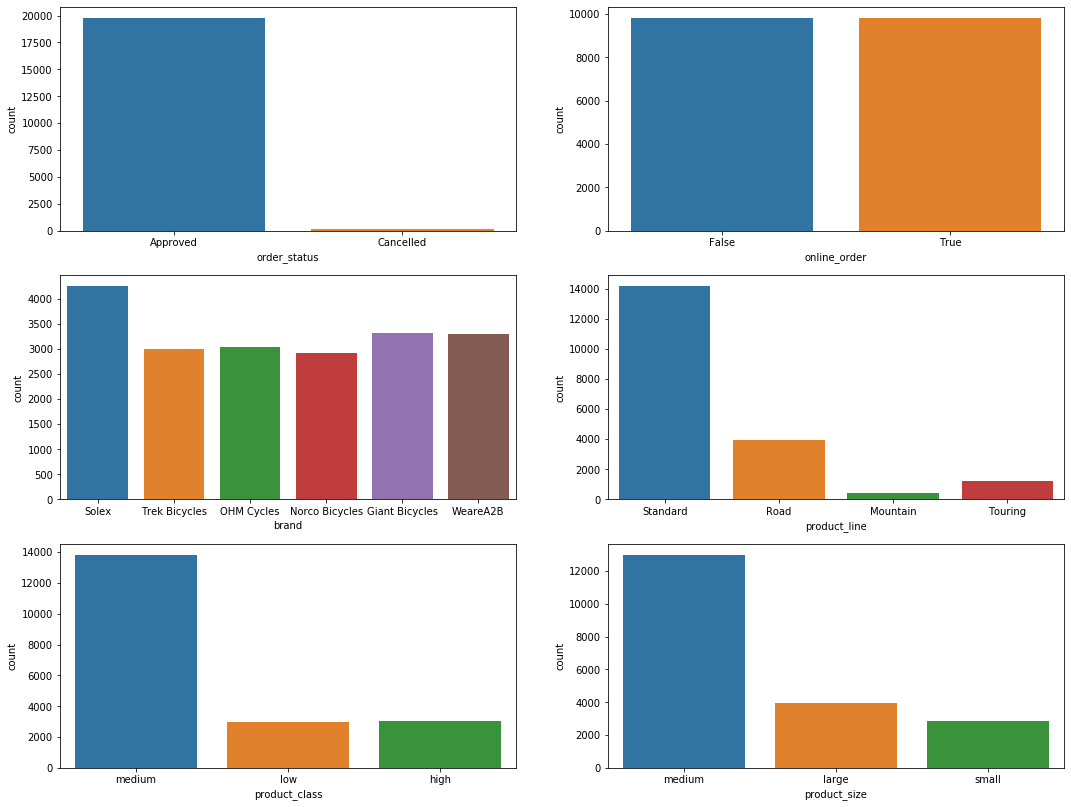

In [17]:
fiq,axes=plt.subplots(3,2,figsize=(18,14))
sns.countplot(df1.order_status,ax=axes[0,0])
sns.countplot(df1.online_order,ax=axes[0,1])
sns.countplot(df1.brand,ax=axes[1,0])
sns.countplot(df1.product_line,ax=axes[1,1])
sns.countplot(df1.product_class,ax=axes[2,0])
sns.countplot(df1.product_size,ax=axes[2,1])
plt.show()

In [18]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12


# CustomerDemographic

In [19]:
df2=pd.read_excel('E:\\Data Science\\Internship\\KPMG_VI_New_raw_data_update_final.xlsx',sheet_name=3)
df2.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [20]:
df2.columns=list(df2.loc[0].values)
df2.drop(0,inplace=True)
df2=df2.reset_index()
df2.drop('index',axis=1,inplace=True)

In [21]:
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [22]:
df2.shape

(4000, 13)

In [23]:
df2[df2.duplicated()].sum()

customer_id                            0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
DOB                                    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
default                                0.0
owns_car                               0.0
tenure                                 0.0
dtype: float64

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null object
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null object
DOB                                    3913 non-null object
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null object
dtypes: object(13)
memory usage: 406.4+ KB


In [25]:
df2['DOB']=pd.to_datetime(df2['DOB'])

In [26]:
df2.describe()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
count,4000.0,4000,3875,4000,4000.0,3913,3494,3344,4000,4000,3698.0,4000,3913.0
unique,4000.0,3139,3725,6,100.0,3448,195,9,3,2,90.0,2,22.0
top,4000.0,Max,Pristnor,Female,16.0,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100.0,Yes,7.0
freq,1.0,5,3,2037,56.0,7,45,799,2000,3998,113.0,2024,235.0
first,NaN,NaN,NaN,NaN,NaN,1843-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2002-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df2.drop('default',axis=1,inplace=True)

In [28]:
df2.gender.value_counts()

Female    2037
Male      1872
U           88
M            1
F            1
Femal        1
Name: gender, dtype: int64

In [29]:
df2.gender.replace({'Femal':'Female'},inplace=True)
df2.gender.replace({'F':'Female'},inplace=True)
df2.gender.replace({'M':'Male'},inplace=True)
df2.gender.replace({'U':'Unknown'},inplace=True)

In [30]:
df2.gender.value_counts()

Female     2039
Male       1873
Unknown      88
Name: gender, dtype: int64

In [31]:
#Missing ratio:
(df2.isnull().sum()/df2.count())*100

customer_id                             0.000000
first_name                              0.000000
last_name                               3.225806
gender                                  0.000000
past_3_years_bike_related_purchases     0.000000
DOB                                     2.223358
job_title                              14.481969
job_industry_category                  19.617225
wealth_segment                          0.000000
deceased_indicator                      0.000000
owns_car                                0.000000
tenure                                  2.223358
dtype: float64

In [32]:
df2.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

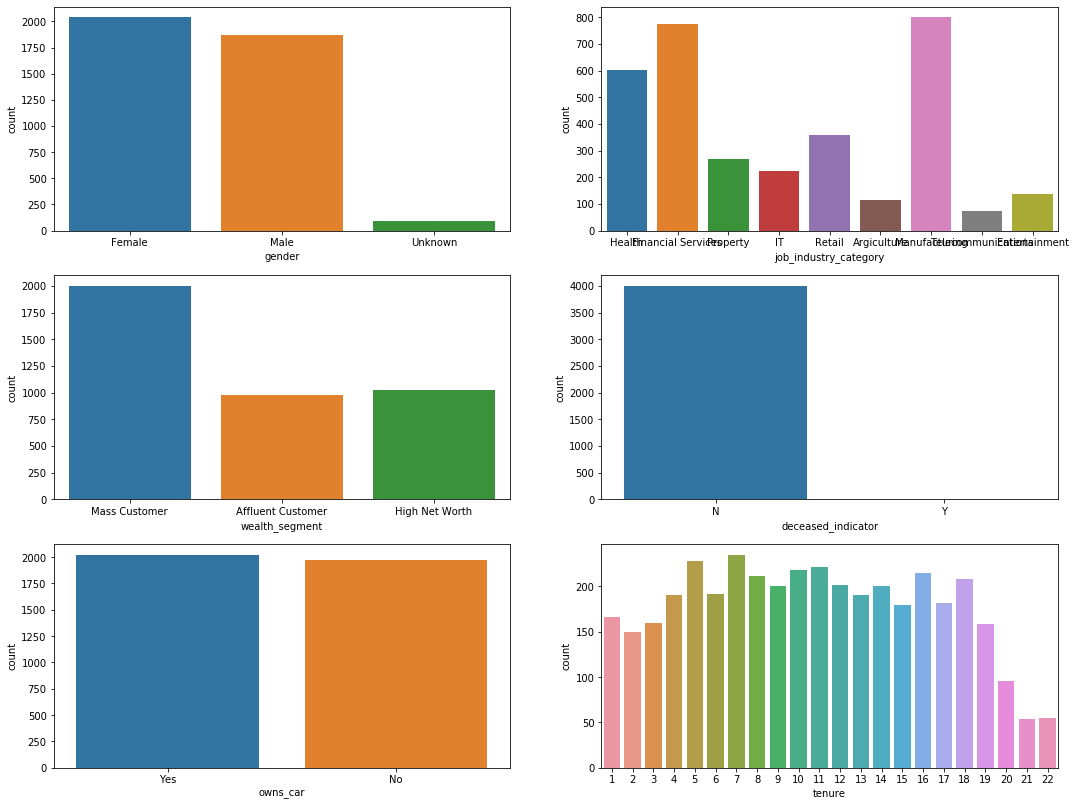

In [33]:
fiq,axes=plt.subplots(3,2,figsize=(18,14))
sns.countplot(df2.gender,ax=axes[0,0])
sns.countplot(df2.job_industry_category,ax=axes[0,1])
sns.countplot(df2.wealth_segment,ax=axes[1,0])
sns.countplot(df2.deceased_indicator,ax=axes[1,1])
sns.countplot(df2.owns_car,ax=axes[2,0])
sns.countplot(df2.tenure,ax=axes[2,1])
plt.show()

In [34]:
df2.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15


# CustomerAddress

In [35]:
df3=pd.read_excel('E:\\Data Science\\Internship\\KPMG_VI_New_raw_data_update_final.xlsx',sheet_name=4)
df3.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [36]:
df3.columns=list(df3.loc[0].values)
df3.drop(0,inplace=True)
df3=df3.reset_index()
df3.drop('index',axis=1,inplace=True)

In [37]:
df3.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [38]:
df3.shape

(3999, 6)

In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null object
address               3999 non-null object
postcode              3999 non-null object
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null object
dtypes: object(6)
memory usage: 187.6+ KB


In [40]:
(df3.isnull().sum()/df3.count())*100

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

In [41]:
df3.property_valuation=df3.property_valuation.astype(float)

In [42]:
df3.describe(include=object)

,customer_id,address,postcode,state,country
count,3999,3999,3999,3999,3999
unique,3999,3996,873,5,1
top,4003,3 Mariners Cove Terrace,2170,NSW,Australia
freq,1,2,31,2054,3999


In [43]:
df3.describe()

,property_valuation
count,3999.000000
mean,7.514379
std,2.824663
min,1.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,12.000000


In [44]:
df3[df3.duplicated()].sum()

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

In [45]:
df3.state.replace({'New South Wales':'NSW','Victoria':'VIC'},inplace=True)

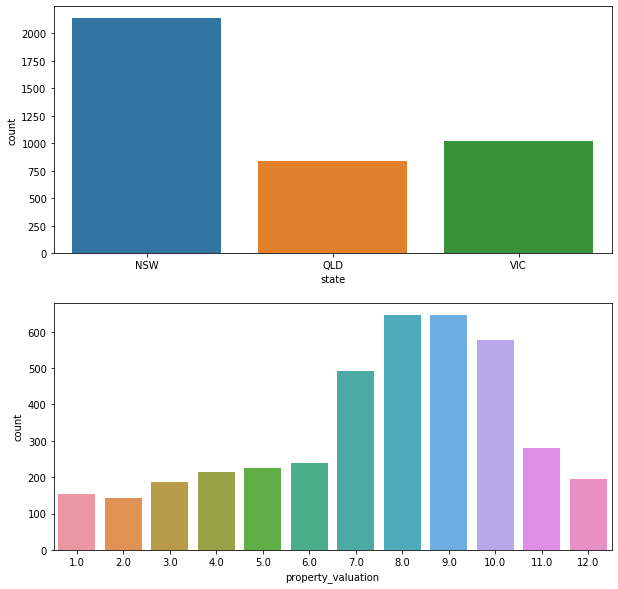

In [46]:
fiq,axes=plt.subplots(2,1,figsize=(10,10))
sns.countplot(df3.state,ax=axes[0])
sns.countplot(df3.property_valuation,ax=axes[1])
plt.show()

In [47]:
df3.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10.0
1,2,6 Meadow Vale Court,2153,NSW,Australia,10.0
2,4,0 Holy Cross Court,4211,QLD,Australia,9.0
3,5,17979 Del Mar Point,2448,NSW,Australia,4.0
4,6,9 Oakridge Court,3216,VIC,Australia,9.0


# Merging df1, df2 and df3

In [48]:
df=pd.merge(df2,df3,on='customer_id')

In [49]:
df=pd.merge(df,df1,on='customer_id')

In [50]:
df.shape

(19968, 29)

In [51]:
df.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-12
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-21


In [52]:
from datetime import datetime
df['Age']=round((datetime.now()-df.DOB)/np.timedelta64(1, 'Y'))

In [53]:
df.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-12,67.0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-21,67.0
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23,67.0


In [54]:
df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'Age'],
      dtype='object')

# RFM

In ecommerce companies like online retails, customer segmentation is necessary in order to understand customers behaviors. It leverages aqcuired customer data like the one we have in our case, **transactions data** in order to divide customers into groups. 

Our goal in this Notebook is to cluster our customers to get insights in:
- Increasing **revenue** (Knowing customers who present most of our revenue)
- Increasing customer **retention**
- Discovering **Trends and patterns** 
- Defining **customers at risk**

We will do **RFM Analysis** as a first step and then **combine RFM with predictive algorithms (k-means)**. 

RFM Analysis answers these questions:
- Who are our best customers?
- Who has the potential to be converted in more profitable customers?
- Which customers we must retain?
- Which group of customers is most likely to respond to our current campaign?

# Prepare the Data

In [55]:
df.iloc[:2,:20]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,NSW,Australia,10.0,94,86,2017-12-23
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,NSW,Australia,10.0,3765,38,2017-04-06


In [56]:
df.iloc[:2,20:]

,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age
0,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-12,67.0
1,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-21,67.0


In [57]:
df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'Age'],
      dtype='object')

In [58]:
df.shape

(19968, 30)

In [59]:
#Customer may vary by geography, here the data is with respect to only Australia customers.
df[df['country']=='Australia'].shape

(19968, 30)

In [60]:
#remove canceled orders
df[df['transaction_id'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age


RFM (**Recency, Frequency, Monetary**) analysis is a customer segmentation technique that uses past purchase **behavior** to divide customers into groups. <br> RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.
- RECENCY (R): Days since last purchase 
- FREQUENCY (F): Total number of purchases 
- MONETARY VALUE (M): Total money this customer spent.

We will create those 3 customer attributes for each customer.

# Recency

To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [61]:
#group by customers and check last date of purshace
recency_df = df.groupby(by='customer_id', as_index=False)['transaction_date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,1,2017-12-23
1,2,2017-08-24
2,4,2017-06-18
3,5,2017-12-14
4,6,2017-10-27


In [62]:
#last date available in our dataset
df['transaction_date'].max()

Timestamp('2017-12-30 00:00:00')

In [63]:
#The last date we have is 2017-12-30 so we will use it as reference.
now = dt.datetime(2017,12,30)
print(now)

2017-12-30 00:00:00


In [64]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [65]:
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

In [66]:
recency_df

,CustomerID,Recency
0,1,7
1,2,128
2,4,195
3,5,16
4,6,64
...,...,...
3484,3496,256
3485,3497,52
3486,3498,127
3487,3499,51


# Frequency

Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [67]:
# drop duplicates
df_copy = df
df_copy.drop_duplicates(subset=['transaction_id', 'customer_id'], keep="first", inplace=True)

#calculate frequency of purchases
frequency_df = df_copy.groupby(by=['customer_id'], as_index=False)['transaction_id'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,1,11
1,2,3
2,4,2
3,5,6
4,6,5


# Monetary

Monetary attribute answers the question: How much money did the customer spent over time?

To do that, first, we will create a new column total cost to have the total price per invoice.

In [68]:
df['profit']=df['list_price']-df['standard_cost']

In [69]:
monetary_df = df.groupby(by='customer_id',as_index=False).agg({'profit': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,1,3018.09
1,2,2226.26
2,4,220.57
3,5,2394.94
4,6,3946.55


# Create RFM table

In [70]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,Frequency
0,1,7,11
1,2,128,3
2,4,195,2
3,5,16,6
4,6,64,5


In [71]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')

#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)

#check the head
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
1,7,11,3018.09
2,128,3,2226.26
4,195,2,220.57
5,16,6,2394.94
6,64,5,3946.55


In [72]:
rfm_df.shape

(3489, 3)

In [73]:
customers_rank = rfm_df.copy()

# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['Monetary'].rank(ascending=0)

customers_rank.head()

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
1,7,11,3018.09,1633.0
2,128,3,2226.26,2303.0
4,195,2,220.57,3435.0
5,16,6,2394.94,2154.0
6,64,5,3946.55,999.0


# Top Customers

In [74]:
customers_rank.sort_values('Rank',ascending=True)

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
941,33,10,11668.95,1.0
2637,54,11,11222.65,2.0
1460,12,8,10787.60,3.0
1558,8,9,10640.30,4.0
729,1,10,10497.78,5.0
...,...,...,...,...
922,188,2,41.13,3485.5
3272,295,1,41.13,3485.5
2274,55,2,35.74,3487.0


In [75]:
#get top 20% of the customers
top_20_cutoff = 3489 *20 /100
top_20_cutoff

697.8

In [76]:
#sum the monetary values over the customer with rank <=698
revenueByTop20 = customers_rank[customers_rank['Rank'] <= 698]['Monetary'].sum()
revenueByTop20

4070941.88

In [77]:
#get the 80% of the revenue
pareto_cutoff = rfm_df['Monetary'].sum() * 0.8
print("The 80% of total revenue is: ",round(pareto_cutoff,2))

The 80% of total revenue is:  8731005.92


In our case, the 80% of total revenue is not achieved by the 20% of TOP customers but approximately, it does, because they are less than our 20% TOP customers who achieve it. It would be interesting to study this group of customers because they are those who make our most revenue.

# Applying RFM score formula

In [78]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,4.0,1841.25
0.50,44.0,6.0,2859.96
0.75,85.0,7.0,4181.00


In [79]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 44.0, 0.75: 85.0},
 'Frequency': {0.25: 4.0, 0.5: 6.0, 0.75: 7.0},
 'Monetary': {0.25: 1841.25, 0.5: 2859.96, 0.75: 4181.0}}

# Creation of RFM segmentation table

We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good.

In [80]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [81]:
#create rfm segmentation table
rfm_segmentation = rfm_df.copy()
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [82]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
6,64,5,3946.55,2,2,3


In [83]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
1,7,11,3018.09,4,4,3,443
2,128,3,2226.26,1,1,2,112
4,195,2,220.57,1,1,1,111
5,16,6,2394.94,4,2,2,422
6,64,5,3946.55,2,2,3,223


Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.

Let's see who are our Champions (best customers).

In [84]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
1460,12,8,10787.60,4,4,4,444
1558,8,9,10640.30,4,4,4,444
729,1,10,10497.78,4,4,4,444
322,1,12,10341.57,4,4,4,444
3232,8,13,8903.62,4,4,4,444
832,17,12,8868.62,4,4,4,444
1140,6,13,8533.23,4,4,4,444
1625,9,8,8499.59,4,4,4,444
2492,7,10,8437.43,4,4,4,444


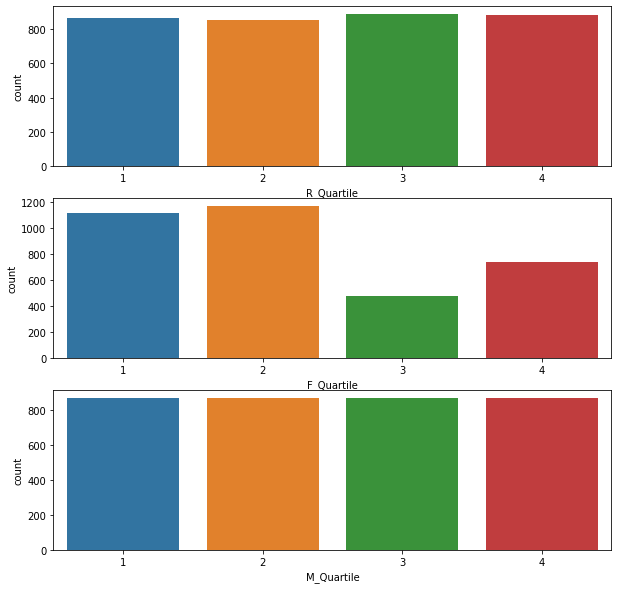

In [85]:
fiq,axes=plt.subplots(3,1,figsize=(10,10))
sns.countplot(rfm_segmentation.R_Quartile,ax=axes[0])
sns.countplot(rfm_segmentation.F_Quartile,ax=axes[1])
sns.countplot(rfm_segmentation.M_Quartile,ax=axes[2])
plt.show()

# How many customers do we have in each segment?

In [86]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  172
Loyal Customers:  735
Big Spenders:  872
Almost Lost:  97
Lost Customers:  31
Lost Cheap Customers:  295


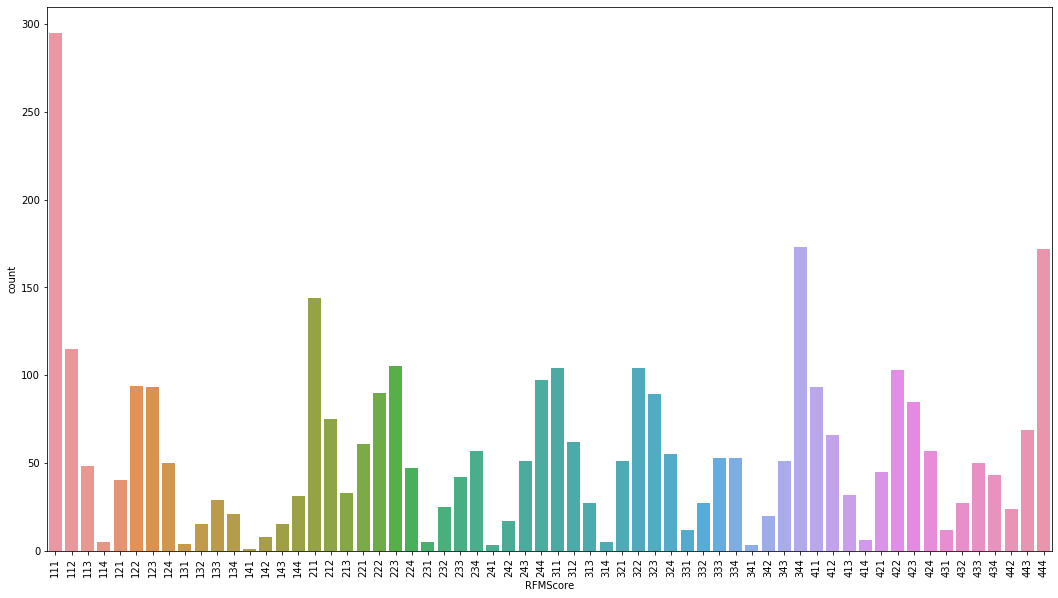

In [87]:
plt.figure(figsize=(18,10))
sns.countplot(rfm_segmentation.RFMScore)
plt.xticks(rotation=90)
plt.show()

Cheap Customers (111), Best Customers (444) and Good Customers (344) are with high frequency.

Best Customers - Champions: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".

At Risk: Send them personalized emails to encourage them to shop.

# Applying K-means clustering on RFM variables

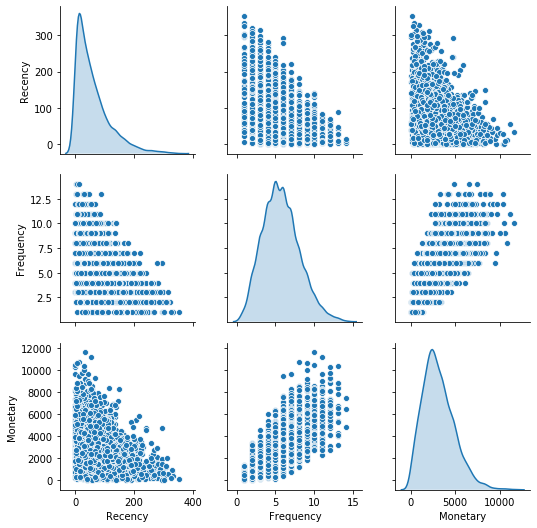

In [88]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(rfm_df,diag_kind='kde')
plt.show()

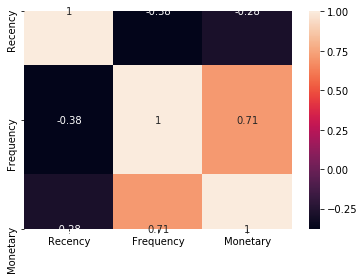

In [89]:
sns.heatmap(rfm_df.corr(),annot=True)
plt.show()

In [90]:
features = rfm_df.columns

In [91]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
rfm_df_pt = pd.DataFrame(pt.fit_transform(rfm_df))
rfm_df_pt.columns = features
rfm_df_pt.head()

,Recency,Frequency,Monetary
0,-1.296838,2.021697,0.075418
1,1.185948,-1.215384,-0.395852
2,1.734088,-1.795424,-2.260507
3,-0.785341,0.199885,-0.289806
4,0.403896,-0.232595,0.561246


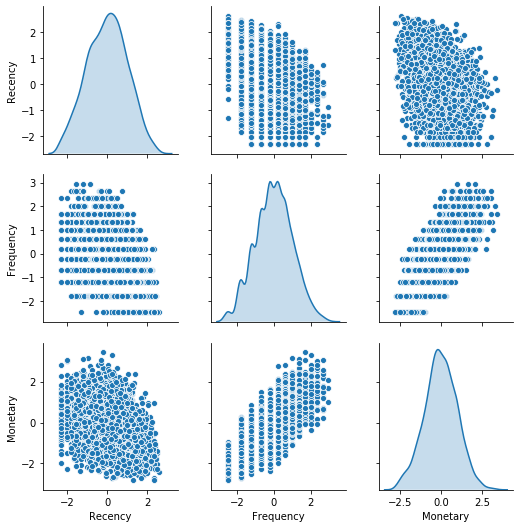

In [92]:
sns.pairplot(rfm_df_pt,diag_kind='kde')
plt.show()

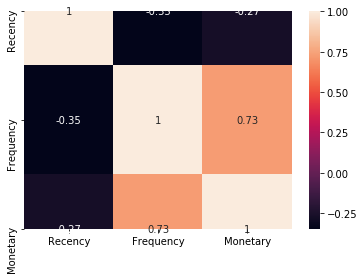

In [93]:
sns.heatmap(rfm_df_pt.corr(),annot=True)
plt.show()

In [94]:
X=rfm_df_pt.copy()

In [95]:
from sklearn.cluster import KMeans

# Let us check optimal number of clusters-
cluster_range = range(1,15)
cluster_errors = []
cluster_sil_scores = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
    clusters.fit(X)
    labels = clusters.labels_                     
    centroids = clusters.cluster_centers_        
    cluster_errors.append( clusters.inertia_ )   
    

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,10467.000000
1,2,6189.660703
2,3,4817.486446
3,4,3789.237250
4,5,3315.441258
5,6,2933.472836
6,7,2678.566756
7,8,2466.822716
8,9,2302.494337
9,10,2168.328933


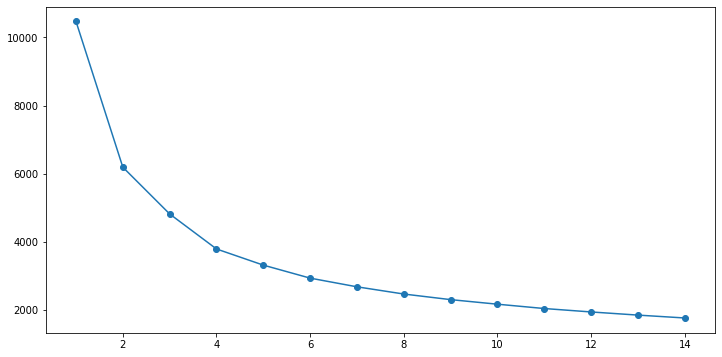

In [96]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

In [97]:
# Number of clusters
kmeans = KMeans(n_clusters=2,n_init = 100,init='k-means++',random_state=0)

kmeans = kmeans.fit(X)

labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_

print("Centroid values")
print("sklearn")
print(centroids)

Centroid values
sklearn
[[ 0.52648876 -0.78663717 -0.74704482]
 [-0.44388593  0.66321866  0.6298381 ]]


In [98]:
colnames = ["Monetary", "Recency","Frequency"]
prediction= kmeans.predict(X)

X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction

In [99]:
X_df.head()

,Monetary,Recency,Frequency,group
0,0.075418,-1.296838,2.021697,1
1,-0.395852,1.185948,-1.215384,0
2,-2.260507,1.734088,-1.795424,0
3,-0.289806,-0.785341,0.199885,1
4,0.561246,0.403896,-0.232595,1


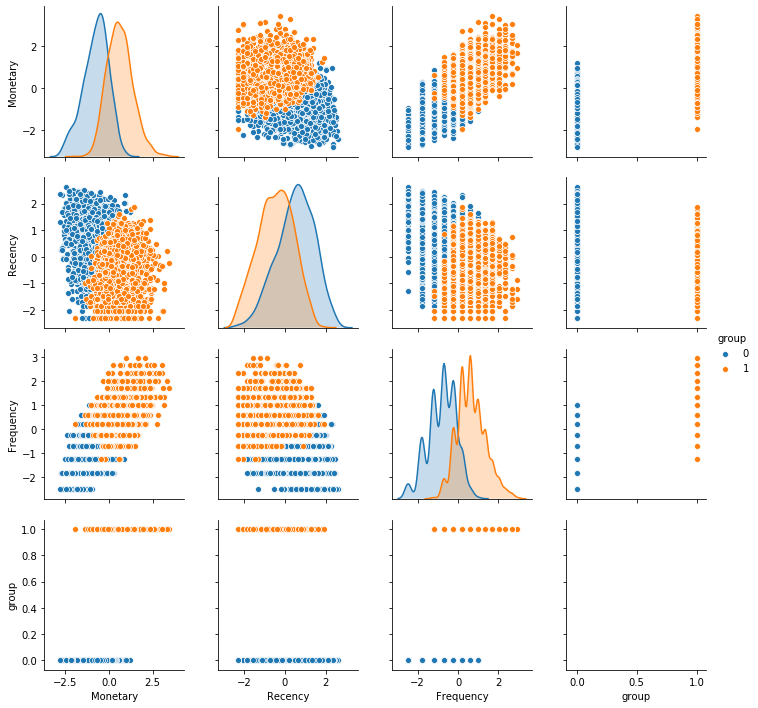

In [100]:
sns.pairplot(X_df,diag_kind='kde',hue='group')
plt.show()

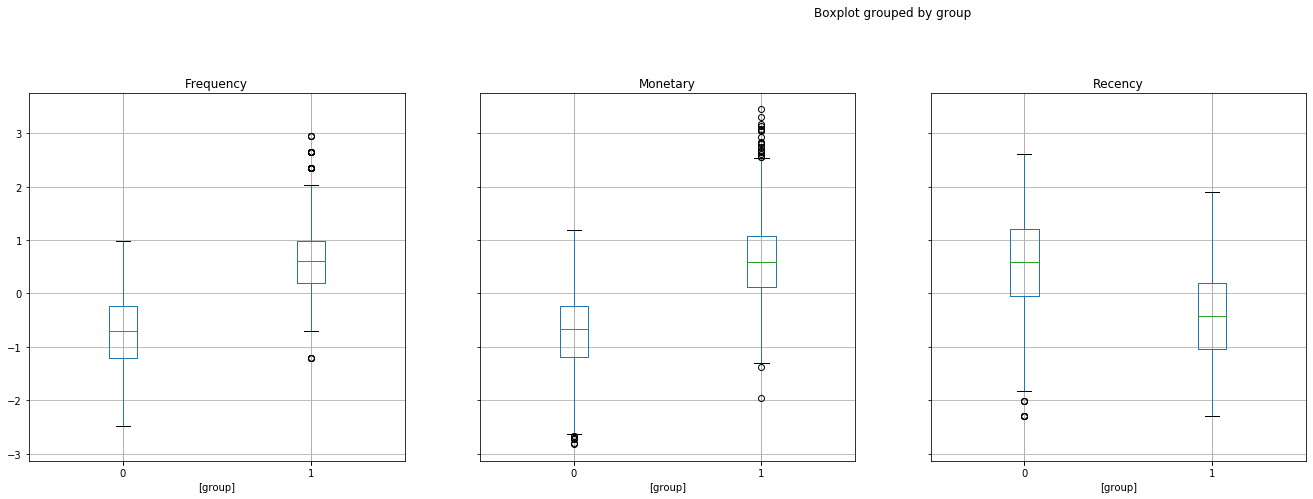

In [101]:
X_df.boxplot(by = 'group',layout=(2,4), figsize=(30, 15))
plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.33834189004562554


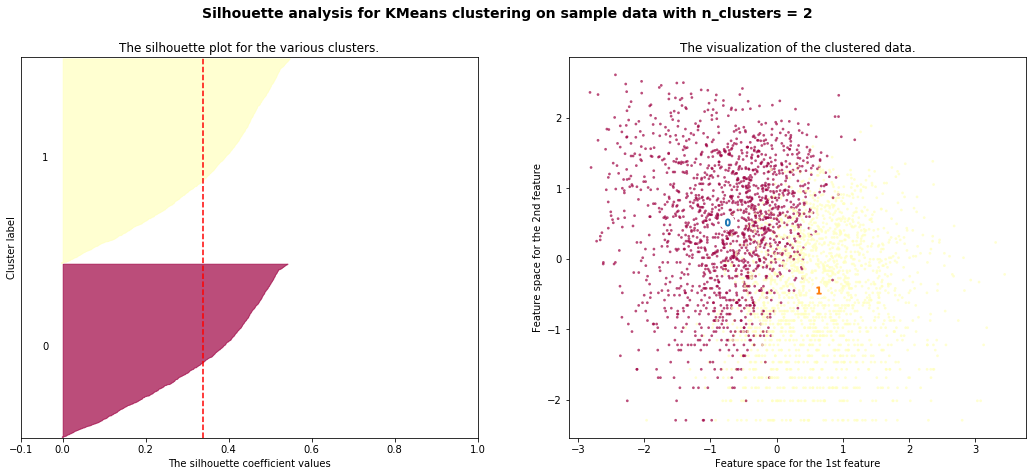

For n_clusters = 3 The average silhouette_score is : 0.29248072578256334


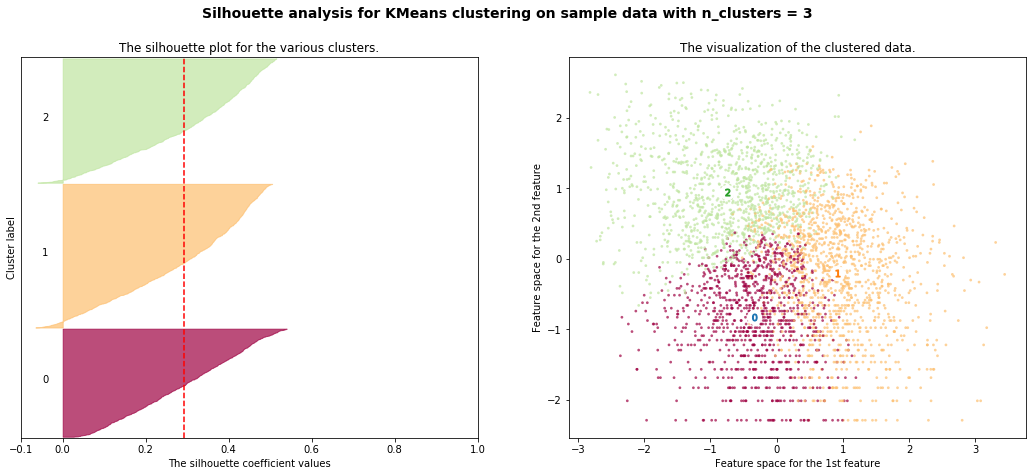

For n_clusters = 4 The average silhouette_score is : 0.2928221535116862


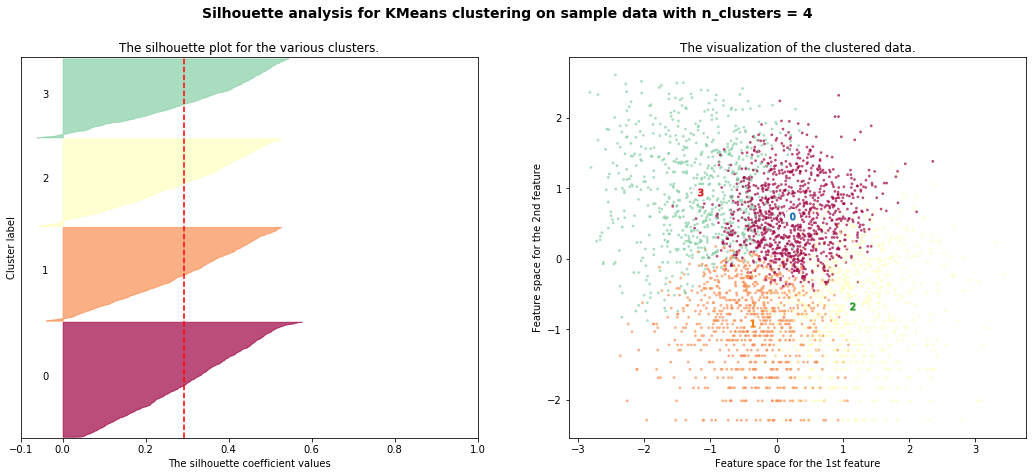

For n_clusters = 5 The average silhouette_score is : 0.274049675719696


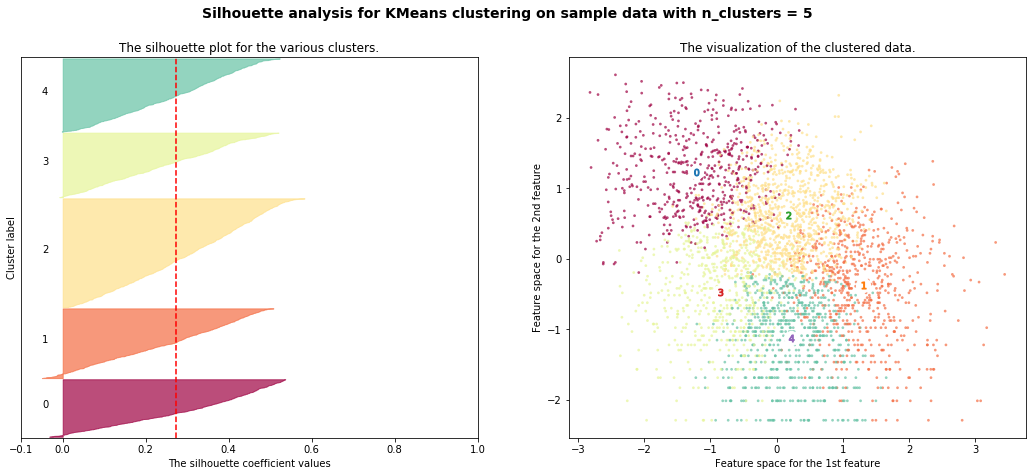

For n_clusters = 6 The average silhouette_score is : 0.25970654726309045


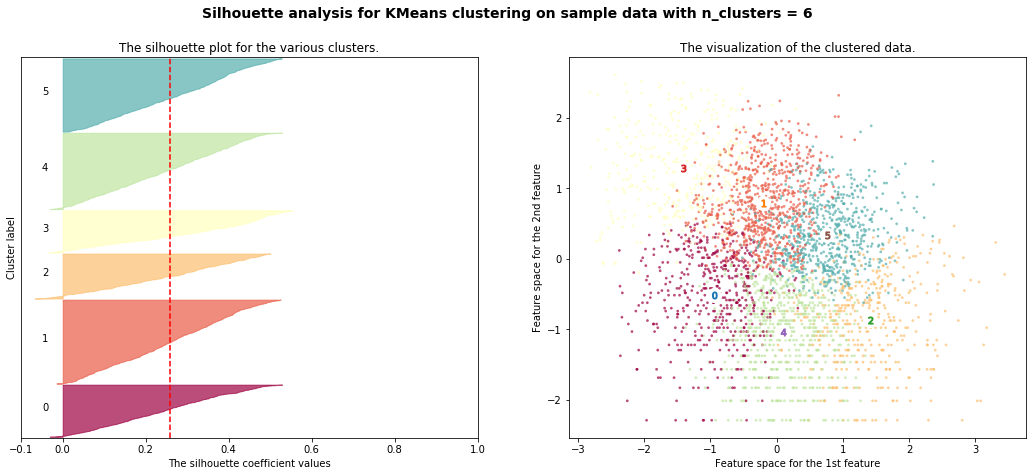

For n_clusters = 7 The average silhouette_score is : 0.2461859884662319


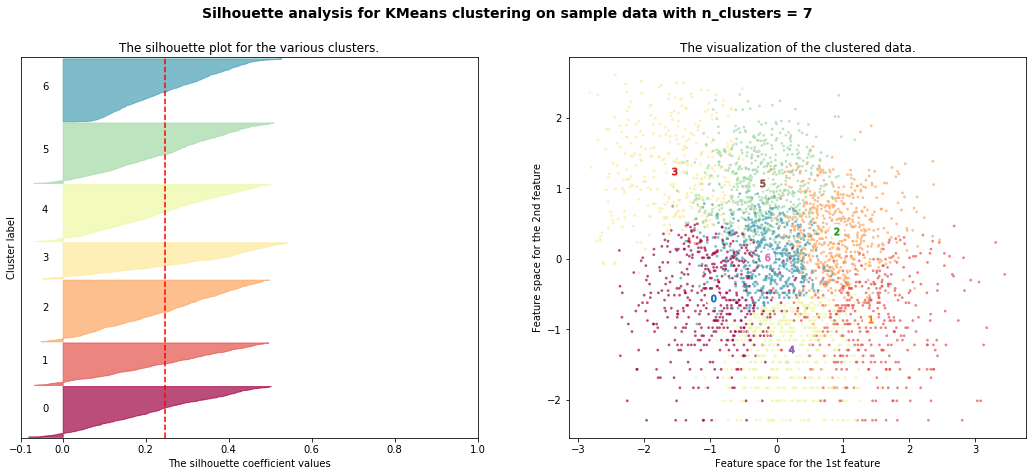

For n_clusters = 8 The average silhouette_score is : 0.24494829192819242


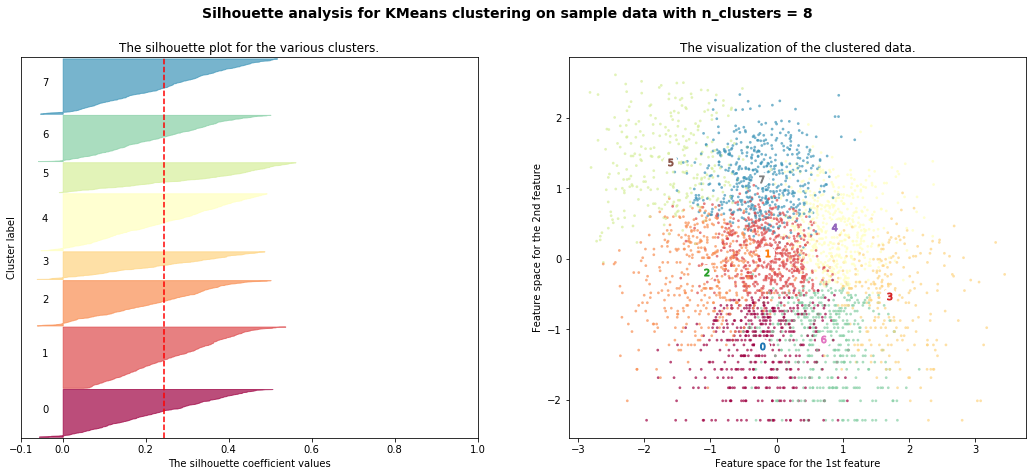

For n_clusters = 9 The average silhouette_score is : 0.23832531895793166


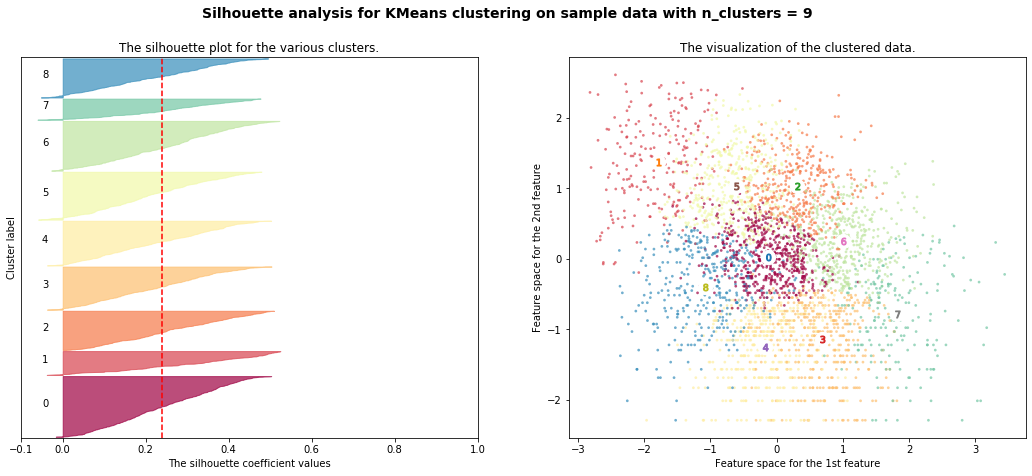

For n_clusters = 10 The average silhouette_score is : 0.23670683623264233


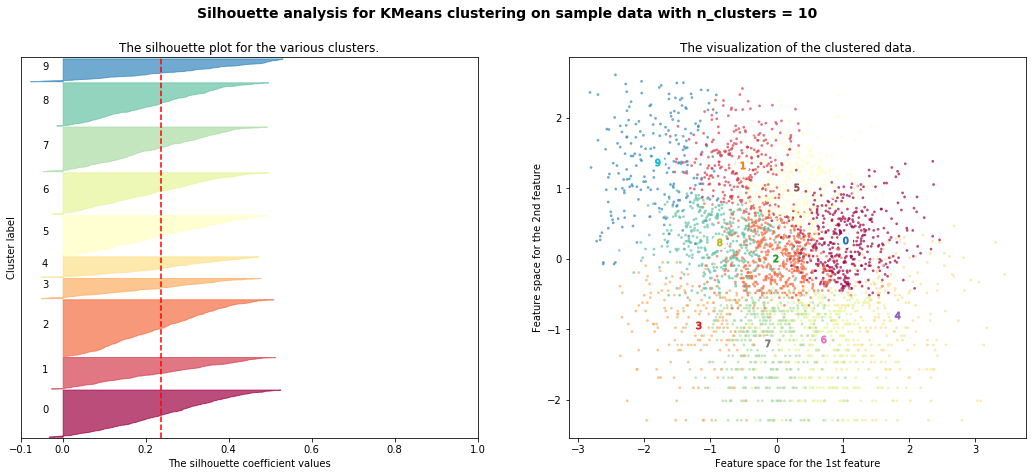

For n_clusters = 11 The average silhouette_score is : 0.23948535526414277


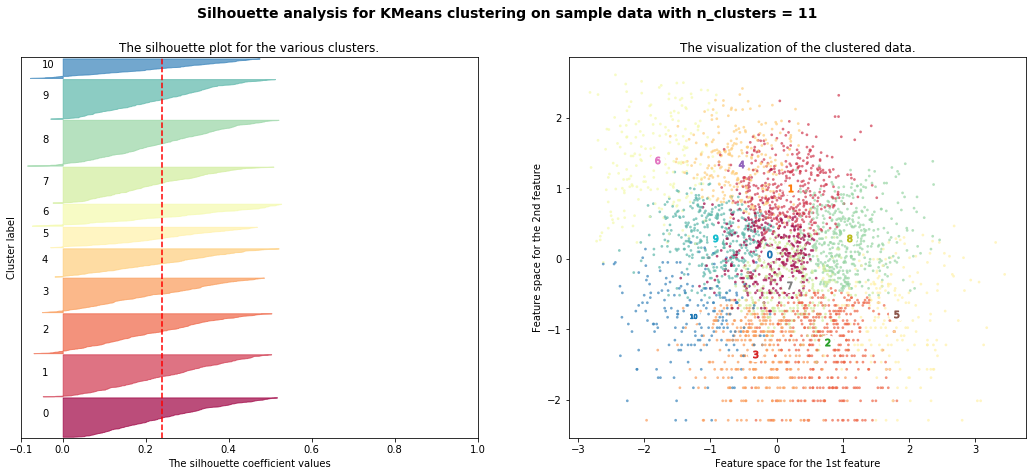

For n_clusters = 12 The average silhouette_score is : 0.2344094270216756


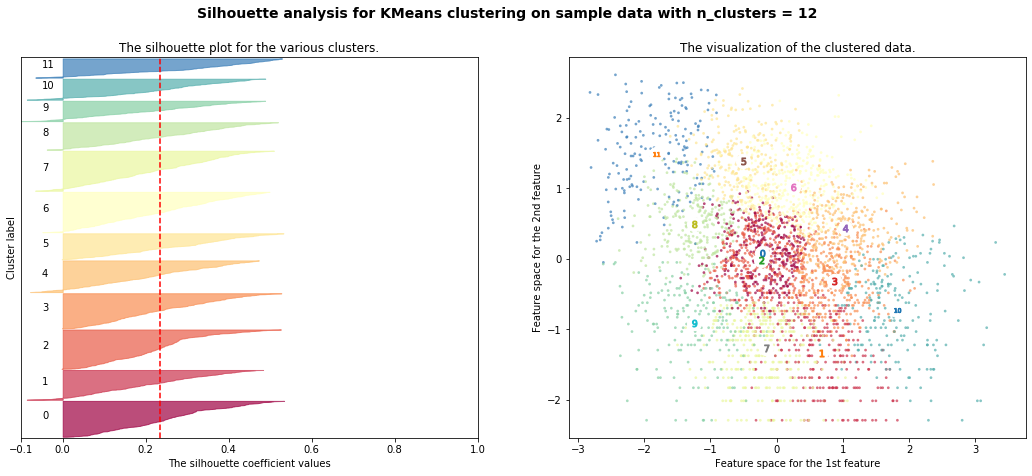

For n_clusters = 13 The average silhouette_score is : 0.23820013053445474


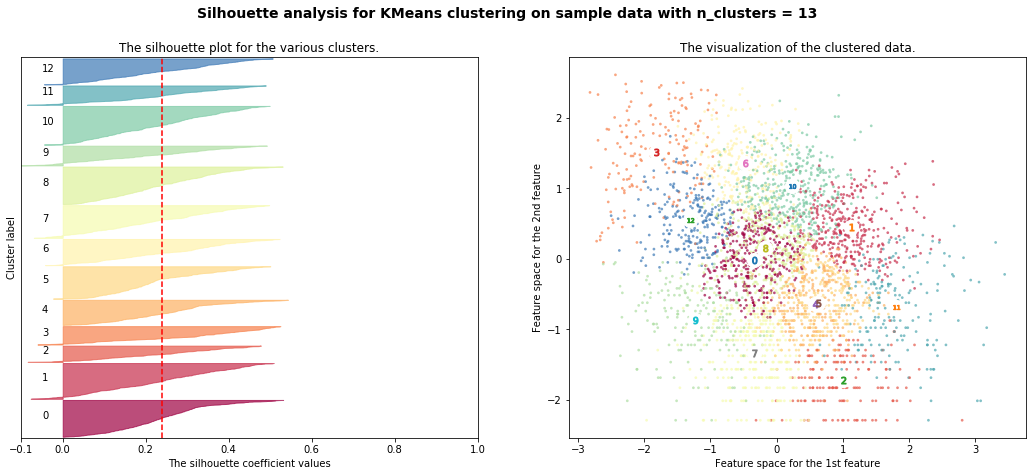

For n_clusters = 14 The average silhouette_score is : 0.2357817584197621


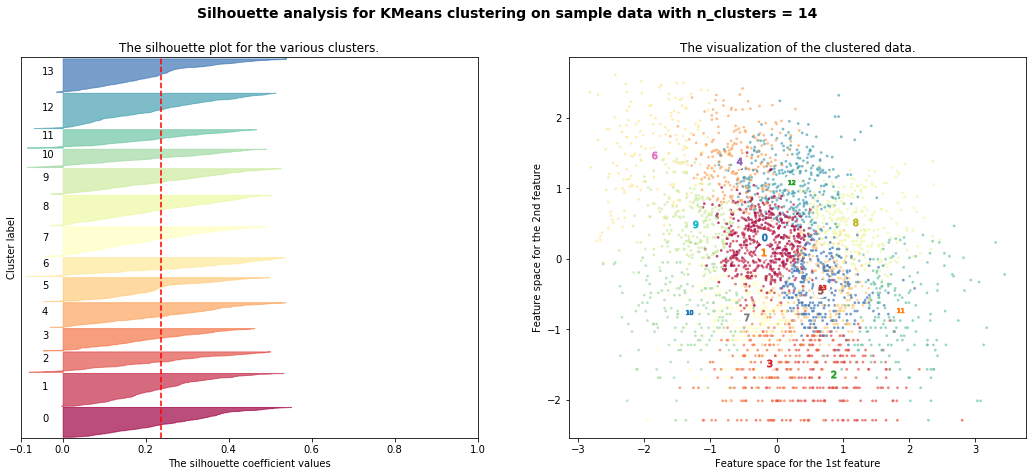

For n_clusters = 15 The average silhouette_score is : 0.23940179568696004


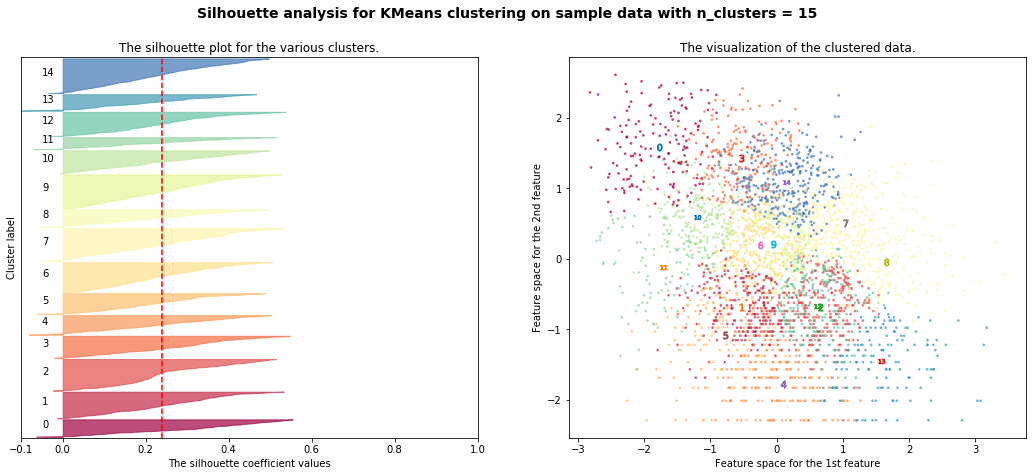

For n_clusters = 16 The average silhouette_score is : 0.2400565920545857


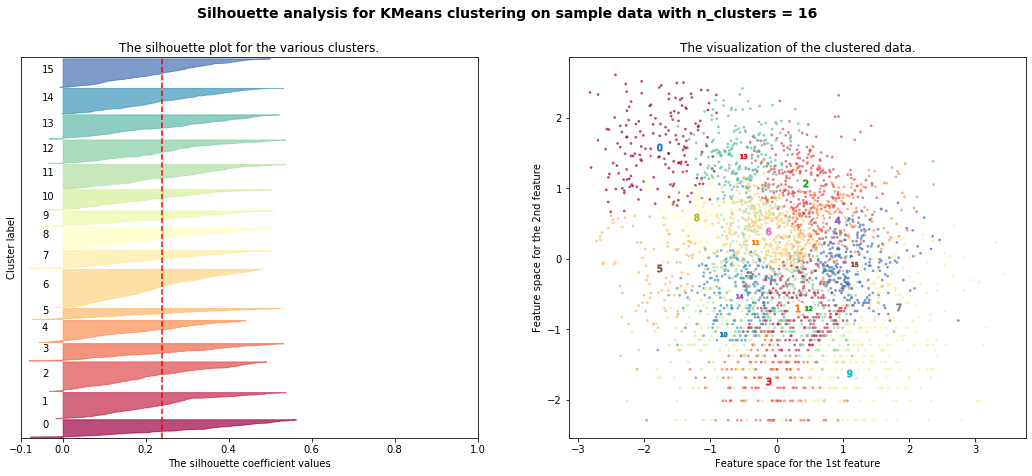

In [102]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_df.drop('group',axis=1).values
y=X_df['group'].values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init = 100,init='k-means++',random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [103]:
from sklearn.cluster import AgglomerativeClustering 
model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')
model2.fit(X)

AgglomerativeClustering()

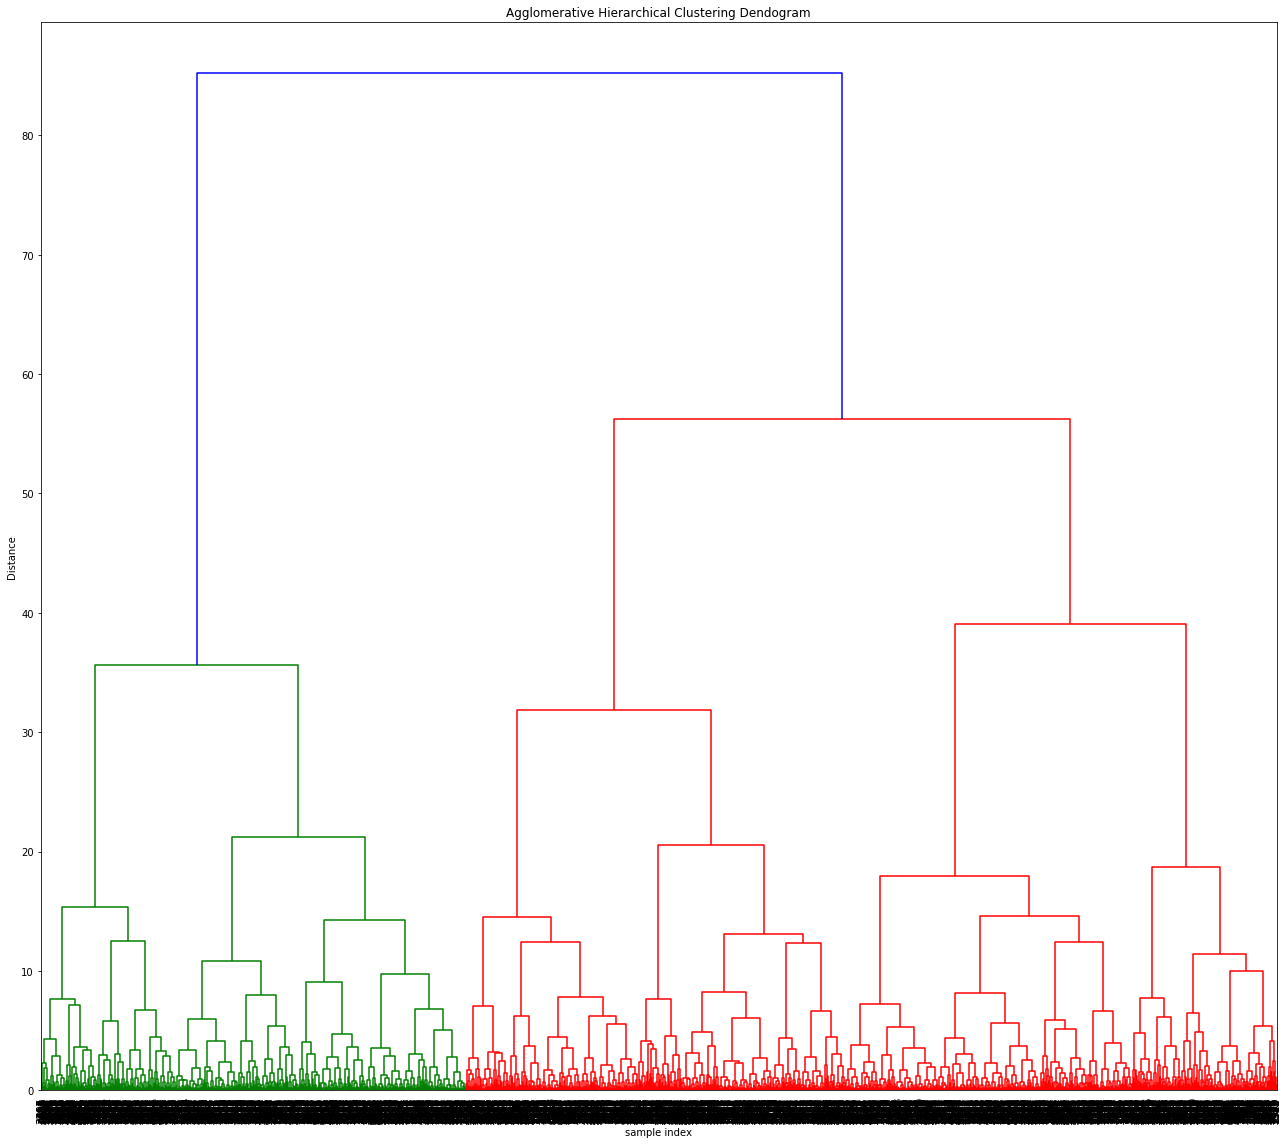

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=80,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()